In [1]:
import pandas as pd
import numpy as np

In [2]:
print(pd.__version__)
# pandas两种常用的数据处理结构: Seris/DataFrame/Panel

1.4.2


In [3]:
# 1.1 series
arr1 = pd.Series([2, 0, -4, 12])  # 创建一个Series对象,Series内部数据类型必须相同
print(arr1)
print(arr1.values)
print(arr1.index)
arr2 = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e'])  # 指定索引
print(arr2)
print(arr2.values)
print(arr2.index)
arr2.index = ['A', 'B', 'C', 'D', 'E']
print(arr2)
dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
print(pd.Series(dict))  # 使用字典生成时无需设置索引
print(pd.Series(dict).describe())  # 对数值列进行统计

0     2
1     0
2    -4
3    12
dtype: int64
[ 2  0 -4 12]
RangeIndex(start=0, stop=4, step=1)
a    1.741838
b    0.932003
c    0.293414
d   -1.660980
e    0.151333
dtype: float64
[ 1.74183758  0.93200299  0.29341394 -1.66098021  0.15133336]
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
A    1.741838
B    0.932003
C    0.293414
D   -1.660980
E    0.151333
dtype: float64
a    1
b    2
c    3
d    4
dtype: int64
count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
dtype: float64


In [4]:
# 1.2 Series中的数据访问

In [5]:
arr3 = {"beijing": 10, "shanghai": 10, "henan": 10, "guangdong": 20, "beijing": None}
print(pd.Series(arr3, name="location"))
print(pd.Series(arr3, name="location")[3])
print(pd.Series(arr3, name="location")["beijing"])
arr4 = pd.Series(arr3, name="location")
print(arr4[["beijing", "guangdong"]])
print(arr4[[1, 3, 0]])  # 以乱序访问

arr5 = pd.Series([1, 2, 3])
arr6 = pd.Series([4, 5, 6])
print(arr5.append(arr6))  # 拼接产生重复索引
print(arr5.append(arr6, ignore_index=True))

beijing       NaN
shanghai     10.0
henan        10.0
guangdong    20.0
Name: location, dtype: float64
20.0
nan
beijing       NaN
guangdong    20.0
Name: location, dtype: float64
shanghai     10.0
guangdong    20.0
beijing       NaN
Name: location, dtype: float64
0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64


C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\2523969469.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(arr5.append(arr6))  # 拼接产生重复索引
C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\2523969469.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(arr5.append(arr6, ignore_index=True))


In [6]:
# 1.3 Series中的向量化操作与布尔索引
arr7 = pd.Series([1, 2, 3, None])
print(arr7 * 2)
print(arr7 + arr7)
print(arr7 > arr7.median())  # 判断元素是否大于所有数据的中位数
print(arr7[arr7 > arr7.median()])  # 抽取特定数据
arr8 = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
print(arr8)
print(np.square(arr8))  # 对每个元素求平方
print(np.abs(arr8))  # 对每个元素求绝对值
print(arr8[1: 3])  # 切片,左闭右开
print(arr8["b": "c"])  # 切片,左闭右闭

0    2.0
1    4.0
2    6.0
3    NaN
dtype: float64
0    2.0
1    4.0
2    6.0
3    NaN
dtype: float64
0    False
1    False
2     True
3    False
dtype: bool
2    3.0
dtype: float64
a   -0.338541
b   -1.638852
c   -0.259460
d   -1.341310
e   -0.489264
dtype: float64
a    0.114610
b    2.685835
c    0.067320
d    1.799114
e    0.239379
dtype: float64
a    0.338541
b    1.638852
c    0.259460
d    1.341310
e    0.489264
dtype: float64
b   -1.638852
c   -0.259460
dtype: float64
b   -1.638852
c   -0.259460
dtype: float64


In [7]:
# 1.4 Seris中的缺失值
temp = np.array([1, 2, 3, np.nan])
arr9 = pd.Series(temp, index=['a', 'b', 'c', 'd'])
print(arr9)
print(arr9.isnull())
print(arr9.notnull())
print(pd.isnull(arr9))
print(arr9[arr9.isnull() == True])
print(arr9[arr9.notnull() == False])

a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64
a    False
b    False
c    False
d     True
dtype: bool
a     True
b     True
c     True
d    False
dtype: bool
a    False
b    False
c    False
d     True
dtype: bool
d   NaN
dtype: float64
d   NaN
dtype: float64


In [8]:
# 1.5 Seris的删除与添加操作, name属性
arr10 = pd.Series([2, 0, -4, 12])
print(arr10)
print(arr10.drop(0))
print(arr10)  # 并不会在原数组真的删除
print(arr10.drop([0, 1]))
print(arr10.drop(0, inplace=True))  # 设置参数,真的删除
print(arr10)
arr11 = pd.Series(np.random.rand(3))
print(arr10.append(arr11))  # 不会改变索引
print(arr10.append(arr11, ignore_index=True))  # 索引重构
arr11.name = 'title'
arr11.index.name = 'label'
print(arr11)

0     2
1     0
2    -4
3    12
dtype: int64
1     0
2    -4
3    12
dtype: int64
0     2
1     0
2    -4
3    12
dtype: int64
2    -4
3    12
dtype: int64
None
1     0
2    -4
3    12
dtype: int64
1     0.000000
2    -4.000000
3    12.000000
0     0.051498
1     0.726388
2     0.582663
dtype: float64
0     0.000000
1    -4.000000
2    12.000000
3     0.051498
4     0.726388
5     0.582663
dtype: float64
label
0    0.051498
1    0.726388
2    0.582663
Name: title, dtype: float64


C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\1651780994.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(arr10.append(arr11))  # 不会改变索引
C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\1651780994.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(arr10.append(arr11, ignore_index=True))  # 索引重构


In [9]:
# 2.1 DataFrame类型
# 2.2.1 构建DataFrame
df1 = pd.DataFrame({'senrences': ['just a test', 'just two test', 'just three test']})
print(df1)
data = {'one':[1, 2, 3], 'two':[4, 5, 6], 'three': [7, 8, 9]}
df2 = pd.DataFrame(data)
print(df2)
data = np.random.randint(1, 10, 9).reshape(3, 3)  # 左闭右开区间的离散均匀分布的随机整数;
df3 = pd.DataFrame(data)
print(df3) 
print(df4)
print(df4.index)  # 读取列名称
print(df4.columns)  # 读取列名称
row1 = pd.Series(np.arange(3), index = ['one', 'two', 'three'])
row2 = pd.Series(np.arange(3), index = ['a', 'b', 'c'])
row1.name = 'Series1'
row2.name = 'Series2'
df5 = pd.DataFrame([row1, row2])  # 通过Series构建DataFrame
print(df5)
print(df5.T)  # 转置,不改变原DataFrame的值
print(df5.transpose())  # 等价于df5.T

         senrences
0      just a test
1    just two test
2  just three test
   one  two  three
0    1    4      7
1    2    5      8
2    3    6      9
   0  1  2
0  2  5  5
1  7  1  5
2  9  3  9
   one  two  thress
a    2    5       5
b    7    1       5
c    9    3       9
Index(['a', 'b', 'c'], dtype='object')
Index(['one', 'two', 'thress'], dtype='object')
         one  two  three    a    b    c
Series1  0.0  1.0    2.0  NaN  NaN  NaN
Series2  NaN  NaN    NaN  0.0  1.0  2.0
       Series1  Series2
one        0.0      NaN
two        1.0      NaN
three      2.0      NaN
a          NaN      0.0
b          NaN      1.0
c          NaN      2.0
       Series1  Series2
one        0.0      NaN
two        1.0      NaN
three      2.0      NaN
a          NaN      0.0
b          NaN      1.0
c          NaN      2.0


In [10]:
# 2.2.2 访问DataFrame中的列与行
df6 = pd.DataFrame(data, columns = ['one', 'two', 'thress'], index = ['a', 'b', 'c'])
print(df6)
print(df6.columns)  # 读取列名,返回的时index对象;
print(df6.columns.values)  # 读区index对象的值;
print(df6.columns.values[0])
print(df6['one'])  # 获取一列数据;
print(df6.one)  # 等价于上面的写法,注意这种写法对于列名不符合python命名规范的情况不适用;
print(df6[['one', 'two']])  #访问多个列;
print(df6[:1])  # 获取多行数据,左闭右开
print(df6[0: 2])
df6.index = ['aa', 'bb', 'cc']  # 修改行索引
print(df6)
print(df6.loc[['aa', 'bb']])  # 访问两行数据
print(df6['a': 'b'])
print(df6.iloc[:,1:])  # 获取所有行第一列之后的数据
print(df6.iloc[1])  # 获取第一行的数据
print(df6.iloc[0: 2])  # 返回连续行,等同于df6[0:2]
print(df6.iloc[[0, 2]])  # 返回间隔行,返回第0行和第2行数据
print(df6.iloc[2, 2])  # 获取第2行第2列的数据
print(df6.iloc[0:2, 1:])  # 获取第0行,第1行,从第1列开始至最后1列的数据

   one  two  thress
a    2    5       5
b    7    1       5
c    9    3       9
Index(['one', 'two', 'thress'], dtype='object')
['one' 'two' 'thress']
one
a    2
b    7
c    9
Name: one, dtype: int32
a    2
b    7
c    9
Name: one, dtype: int32
   one  two
a    2    5
b    7    1
c    9    3
   one  two  thress
a    2    5       5
   one  two  thress
a    2    5       5
b    7    1       5
    one  two  thress
aa    2    5       5
bb    7    1       5
cc    9    3       9
    one  two  thress
aa    2    5       5
bb    7    1       5
    one  two  thress
aa    2    5       5
    two  thress
aa    5       5
bb    1       5
cc    3       9
one       7
two       1
thress    5
Name: bb, dtype: int32
    one  two  thress
aa    2    5       5
bb    7    1       5
    one  two  thress
aa    2    5       5
cc    9    3       9
9
    two  thress
aa    5       5
bb    1       5


In [11]:
# 2.2.3 DataFrame中的删除操作
data = {'one': [1, 2, 3],'two': [4, 5, 6],'three': [7, 8, 9]}
df7 = pd.DataFrame(data)
print(df7['three'])
print(type(df7['three']))  # 验证数据类型为Series
print(df7.drop('three', axis = 'columns'))  # 删除一列数据,等价于axis=1;
print(df7)
print(id(df7))
df7 = df7.drop('three', axis = 1)
print(id(df7))  # 删除操作前后df7地址不同
df7 = pd.DataFrame(data)  # 复原
df7.drop('three', axis = 1, inplace = True)  # 删除原始数据
del df7['one']
print(df7)
df7 = pd.DataFrame(data)  # 复原
df7.drop(0, axis = 0)  # 删除一行
print(df7)
df7.drop([0, 1], axis = 0)  # 删除一行

0    7
1    8
2    9
Name: three, dtype: int64
<class 'pandas.core.series.Series'>
   one  two
0    1    4
1    2    5
2    3    6
   one  two  three
0    1    4      7
1    2    5      8
2    3    6      9
2816182502112
2816184685328
   two
0    4
1    5
2    6
   one  two  three
0    1    4      7
1    2    5      8
2    3    6      9


,one,two,three
2,3,6,9


In [12]:
# 7.4.4 DataFrame中的轴方向
df8 = pd.DataFrame(np.random.randint(10, size = (3, 2)), columns = list('AB'))
print(df8)
print(df8.max(axis = 1))  # 求水平方向的最大值,axis = 1等价于axis = 'columns'
                          #                  axis = 0等价于axis = 'index'
print(df8.max(axis = 'columns'))
print(df8.max(axis = 0))
print(df8.max(axis = 'index'))

   A  B
0  7  9
1  9  7
2  8  2
0    9
1    9
2    8
dtype: int32
0    9
1    9
2    8
dtype: int32
A    9
B    9
dtype: int32
A    9
B    9
dtype: int32


In [13]:
# 7.4.5 DataFrame中的添加操作
from numpy.random import randint
df9 = pd.DataFrame(columns = ['属性1', '属性2', '属性3'])
print(df9)
for index in range(5):
    df9.loc[index] = ['name ' + str(index)] + list(randint(10, size = 2))
print(df9)
df9.loc['new_row'] = 3
print(df9)
df9.loc['new_row2'] = ['name5', 11, 22]  # 添加一个新行
print(df9)
df10 = pd.DataFrame({'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8]})
df11 = pd.DataFrame({'a': [1, 2, 3], 'b': [5, 6, 7]})
df10.append(df11)  # 矩阵叠加
df10.append(df11, ignore_index = True)
df12 = pd.DataFrame({'a': [1, 2, 3, 4], 
                     'b': [5, 6, 7, 8]})
df13 = pd.DataFrame({'a': [1, 2, 3], 
                     'b': [5, 6, 7],
                     'c': [7, 8, 9]})
df12.append(df13, ignore_index = True)
df14 = pd.DataFrame({'a': [1, 2, 3, 4],
                     'b': [5, 6, 7, 8]})
df14['new_col_1'] = 3  # 添加列,触发广播机制
print(df14)
df14['new_col_2'] =[1, 2, 3, 4]  # 要么1个要么行数匹配
print(df14)
df15 = pd.DataFrame([['a', 1], ['b', 2]], columns = ['letter', 'number'])
df16 = pd.DataFrame([['c', 3], ['d', 4]], columns = ['letter', 'number'])
print(df15)
print(df16)
pd.concat([df15, df16], axis = 1)  # 水平方向堆叠
pd.concat([df15, df16], ignore_index = True, axis = 1)  # 水平方向堆叠,排除私人化索引

Empty DataFrame
Columns: [属性1, 属性2, 属性3]
Index: []
      属性1  属性2  属性3
0  name 0    9    4
1  name 1    1    1
2  name 2    9    0
3  name 3    8    9
4  name 4    8    8
            属性1  属性2  属性3
0        name 0    9    4
1        name 1    1    1
2        name 2    9    0
3        name 3    8    9
4        name 4    8    8
new_row       3    3    3
             属性1  属性2  属性3
0         name 0    9    4
1         name 1    1    1
2         name 2    9    0
3         name 3    8    9
4         name 4    8    8
new_row        3    3    3
new_row2   name5   11   22
   a  b  new_col_1
0  1  5          3
1  2  6          3
2  3  7          3
3  4  8          3
   a  b  new_col_1  new_col_2
0  1  5          3          1
1  2  6          3          2
2  3  7          3          3
3  4  8          3          4
  letter  number
0      a       1
1      b       2
  letter  number
0      c       3
1      d       4


C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\1644324505.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df10.append(df11)  # 矩阵叠加
C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\1644324505.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df10.append(df11, ignore_index = True)
C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\1644324505.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df12.append(df13, ignore_index = True)


,0,1,2,3
0,a,1,c,3
1,b,2,d,4


In [14]:
# 7.5 基于pandas的文件读取和分析
# 7.5.1 文件读取
df17 = pd.read_csv('datasets/housing.csv')
df17

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
8305,-118.12,33.76,45.0,3035.0,516.0,1127.0,527.0,7.0796,500001.0,NEAR OCEAN
8306,-118.12,33.75,41.0,2072.0,491.0,742.0,414.0,3.9934,500001.0,NEAR OCEAN
8307,-118.14,33.71,36.0,2484.0,525.0,792.0,446.0,5.1815,500001.0,NEAR OCEAN
8308,-118.10,33.76,15.0,4690.0,1002.0,1879.0,974.0,5.6051,267400.0,NEAR OCEAN


In [15]:
# 7.5.2 DataFrame常用属性
print(df17.dtypes)  # 查看各列的数据类型;
print(df17['longitude'].dtype)
print(df17[['longitude', 'latitude']].dtypes)
print(df17.columns)
print(df17.axes)  # 返回列标签和行标签
print(df17.ndim)  # 返回DataFrame的维度
print(df17.shape)  # 返回数据的维度信息
print(df17.size)  # 返回DataFrame中的元素个数
df17.values  # 返回数值部分

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
float64
longitude    float64
latitude     float64
dtype: object
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
[RangeIndex(start=0, stop=8310, step=1), Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')]
2
(8310, 10)
83100


array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-118.14, 33.71, 36.0, ..., 5.1815, 500001.0, 'NEAR OCEAN'],
       [-118.1, 33.76, 15.0, ..., 5.6051, 267400.0, 'NEAR OCEAN'],
       [-118.11, 33.77, 15.0, ..., 5.1508, nan, nan]], dtype=object)

In [16]:
# 7.5.3 DataFrame常用方法
df17.head()
df17.head(10)
df17.tail()
df17.describe()  # 显示数据的计数,平均值,标准差,最大值,最小值及百分位数
df17['total_rooms'].mean()  # 返回某列的均值
df17['total_rooms'].median()  # 返回某列的中位数
df17['total_rooms'].count()  # 计数
df17.housing_median_age.value_counts()  # 分类统计
df17.housing_median_age.value_counts(ascending = True)  # 分类统计,并排序
df17.housing_median_age.value_counts(normalize = True, ascending = True)  # 分类统计,并统计占比

1.0     0.000120
2.0     0.001083
3.0     0.001444
51.0    0.003249
6.0     0.004332
4.0     0.004452
7.0     0.004452
5.0     0.005535
9.0     0.006017
8.0     0.006619
12.0    0.006980
11.0    0.007702
10.0    0.008664
13.0    0.009507
49.0    0.009747
50.0    0.010590
14.0    0.010830
48.0    0.011913
22.0    0.014681
47.0    0.014801
21.0    0.015162
15.0    0.015884
24.0    0.017088
23.0    0.017329
20.0    0.017569
46.0    0.017810
19.0    0.017930
16.0    0.018412
18.0    0.019615
40.0    0.019976
17.0    0.020939
27.0    0.021661
26.0    0.021901
28.0    0.022022
45.0    0.022142
25.0    0.022503
29.0    0.022984
41.0    0.023225
31.0    0.023586
30.0    0.025271
43.0    0.025271
38.0    0.025511
44.0    0.025752
39.0    0.026233
42.0    0.027677
32.0    0.029844
37.0    0.034176
33.0    0.034296
34.0    0.040554
35.0    0.052106
36.0    0.061011
52.0    0.071841
Name: housing_median_age, dtype: float64

In [17]:
# 7.5.4 DataFrame的条件过滤
df17[df17.housing_median_age >= 40]
df17[df17.housing_median_age >= 40].count()
df17[df17.housing_median_age >= 40][df17.total_rooms >= 1000]
df17[df17.housing_median_age >= 40][df17.total_rooms >= 1000].population.mean()

C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\2036666042.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df17[df17.housing_median_age >= 40][df17.total_rooms >= 1000]
C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\2036666042.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df17[df17.housing_median_age >= 40][df17.total_rooms >= 1000].population.mean()


1159.593220338983

In [18]:
# 7.5.5 DataFrame的切片操作
df17['total_rooms']
df17[5: 15]
df17.loc[5: 15, ['longitude', 'total_rooms', 'population']]  # 读取特定行和列交叉切片部分
df17[5: 15][['longitude', 'total_rooms', 'population']]  # 读取特定行和列交叉切片部分

,longitude,total_rooms,population
5,-122.25,919.0,413.0
6,-122.25,2535.0,1094.0
7,-122.25,3104.0,1157.0
8,-122.26,2555.0,1206.0
9,-122.25,3549.0,1551.0
10,-122.26,2202.0,910.0
11,-122.26,3503.0,1504.0
12,-122.26,2491.0,1098.0
13,-122.26,696.0,345.0
14,-122.26,2643.0,1212.0


In [19]:
# 7.5.6 DataFrame排序操作
df17.sort_values(by = 'housing_median_age').head()
df17.sort_values(by = ['housing_median_age', 'population'], ascending = [True, False]).head(10)  # True - 升序, False - 降序

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,INLAND
2206,-119.88,36.83,2.0,4055.0,735.0,1730.0,654.0,4.2132,96500.0,INLAND
1648,-121.96,37.99,2.0,3129.0,707.0,1606.0,698.0,2.9591,210100.0,INLAND
2339,-119.67,36.82,2.0,2579.0,376.0,1133.0,342.0,4.5577,123300.0,INLAND
3140,-118.19,34.87,2.0,2103.0,389.0,923.0,338.0,5.0553,111100.0,INLAND
854,-122.01,37.59,2.0,838.0,295.0,240.0,149.0,2.8750,237500.0,NEAR BAY
1565,-121.93,37.78,2.0,227.0,35.0,114.0,49.0,3.1591,434700.0,<1H OCEAN
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY
2774,-115.80,33.26,2.0,96.0,18.0,30.0,16.0,5.3374,47500.0,INLAND
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN


In [20]:
# 7.5.7 pandas的聚合和分组运算
df17.population.agg(['min', 'max', 'mean', 'median'])
df17.population.agg(['min', 'max', np.mean, 'median'])  # 使用第三方或者自定义的聚合函数
df17['population'].mode()  # 众数
df17['population'].agg('mode')  # 众数
df17['population'].value_counts()  # 分组统计验证众数的计算结果
df17[['population', 'total_rooms']].agg(['skew', 'kurt'])  # 计算峰度(大于0较正态分布陡峭,小于0较正态分布平坦)和偏度(大于0分布右偏, 小于0分布左偏)
df17_ocean_proximity = df17.groupby(['ocean_proximity'])
print(type(df17_ocean_proximity))
df17_ocean_proximity.mean()  # 计算分组之后的均值
df17_ocean_proximity.count()  # 计算分组之后的计数
df17_ocean_proximity.median()  # 计算分组之后的中位数 
df17_ocean_proximity.describe()  # 计算分组之后的统计描述
df17.groupby('ocean_proximity')[['total_rooms']].mean() # 双层方括号,返回DataFrame对象
df17.groupby('ocean_proximity')['total_rooms'].mean()  # 单层方括号,返回Series对象
df17.groupby('ocean_proximity')['total_rooms', 'housing_median_age'].agg(['mean', 'std', 'skew'])  # 通过ocean_proximity分组后
                                                                                                   # 求total_rooms,housing_median_age的均值,标准差,偏度

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\zhangcy4\AppData\Local\Temp\ipykernel_112532\1281672058.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df17.groupby('ocean_proximity')['total_rooms', 'housing_median_age'].agg(['mean', 'std', 'skew'])  # 通过ocean_proximity分组后


total_rooms                        housing_median_age  \
                        mean          std      skew               mean   
ocean_proximity                                                          
<1H OCEAN        2319.877437  1862.310131  4.658267          34.435806   
INLAND           2419.745887  1878.873015  3.271280          25.787934   
NEAR BAY         2368.720280  1821.879717  3.158761          36.620047   
NEAR OCEAN       2129.385445  1033.581893  0.927193          34.280323   

                                      
                       std      skew  
ocean_proximity                       
<1H OCEAN        10.070987 -0.496504  
INLAND           12.008563  0.277751  
NEAR BAY         12.541477 -0.521987  
NEAR OCEAN       11.303055 -0.249265

In [21]:
# 7.5.8 DataFrame透视表
df18 = pd.read_csv("datasets/housing.csv")
pd.pivot_table(df18, index = ['ocean_proximity'])  # 默认aggfunc='mean'
df18.pivot_table(index = ['ocean_proximity'])  # 另一种写法
df18.pivot_table(index = ['ocean_proximity', 'housing_median_age'])  # 设置二级index
df18.pivot_table(index = ['ocean_proximity', 'housing_median_age']).unstack()  # 将数据的行旋转为列
df18.pivot_table(index = ['ocean_proximity', 'housing_median_age']).unstack().stack()  # 将数据的列旋转为行
df18.pivot_table(index = ['ocean_proximity', 'housing_median_age'], values = ['households', 'population'])
df18.pivot_table(index = ['ocean_proximity', 'housing_median_age'], values = ['households', 'population'], aggfunc = [np.mean, 'sum'])

mean                     sum  \
                                     households   population households   
ocean_proximity housing_median_age                                        
<1H OCEAN       2.0                   29.000000    69.500000       58.0   
                3.0                  304.500000   514.500000      609.0   
                4.0                 1300.875000  3129.250000    10407.0   
                5.0                  830.214286  2456.142857    11623.0   
                6.0                  751.538462  1982.076923     9770.0   
...                                         ...          ...        ...   
NEAR OCEAN      48.0                 351.666667  1312.333333     1055.0   
                49.0                 576.250000  1111.250000     2305.0   
                50.0                 359.500000   751.000000     2157.0   
                51.0                 566.000000  1171.000000      566.0   
                52.0                 418.741935  1012.354839    12981.0   

                                               
                                   population  
ocean_proximity housing_median_age             
<1H OCEAN       2.0                     139.0  
                3.0                    1029.0  
                4.0                   25034.0  
                5.0                   34386.0  
                6.0                   25767.0  
...                                       ...  
NEAR OCEAN      48.0                   3937.0  
                49.0                   4445.0  
                50.0                   4506.0  
                51.0                   1171.0  
                52.0                  31383.0  

[199 rows x 4 columns]

In [22]:
# 7.5.9 DataFrame的类SQL操作
df18[df18['ocean_proximity'] == 'NEAR BAY'].head(10)  # 符合条件的前十行
df18.query("ocean_proximity == 'NEAR BAY'").head(10)  # 功能同上
str = 'NEAR BAY'
df18.query("ocean_proximity == @str").head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


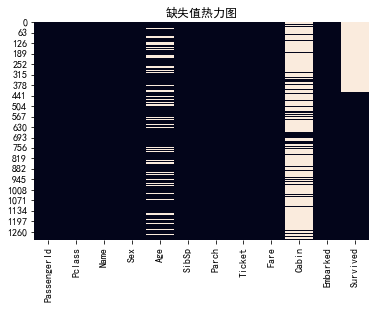

In [23]:
# 7.5.10 DataFrame中的数据清洗方法
import seaborn as sns
import matplotlib.pyplot as plt
df19 = pd.read_csv("datasets/Titanic_test.csv")
df19.head()
df19.shape
df19.info()
df19.describe()
df20 = pd.read_csv("datasets/Titanic_train.csv")
df20.isnull().sum()  # 查看数据急缺失值的个数
df19_df20 = pd.concat([df19, df20], ignore_index = True, sort = False)  # 拼接,默认使用外连接
df19_df20
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.heatmap(df19_df20.isnull(), cbar = False).set_title(r"缺失值热力图")
df19_df20['Embarked'].isnull().sum()  # 填充前缺失值的数量
df19_df20['Embarked'].fillna(df19_df20['Embarked'].mode()[0], inplace = True)  # 使用众数填充
df19_df20['Embarked'].isnull().sum()  # 填充后缺失值的数量
df19_df20['Age'].isnull().sum()  # 填充前缺失值的数量
df19_df20['Age'].fillna(df19_df20['Age'].mean(), inplace = True)  # 使用众数填充
df19_df20['Age'].isnull().sum()  # 填充后缺失值的数量
percent_1 = df19_df20.isnull().sum() / df19_df20.isnull().count() * 100
percent_2 = round(percent_1, 2).sort_values(ascending = False)
total = df19_df20.isnull().sum().sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head()
df19_df20['Fare'].fillna(df19_df20['Fare'].mean(), inplace = True)
df19_df20['Cabin'].fillna('NA', inplace = True)
train_clean = df19_df20[df19_df20['Survived'].notnull()]
train_clean.to_csv('datasets/Titanic_train_clean.csv')
test_clean = df19_df20[df19_df20['Survived'].notnull()]
test_clean.drop('Survived', axis = 1).to_csv('datasets/Titanic_test_clean.csv')